In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [121]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anjan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anjan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [123]:
df=pd.read_csv(r"data\Movies_Genre_Description.csv")
df=df[['GENRE', 'DESCRIPTION']].dropna()

In [124]:
df.head()

,GENRE,DESCRIPTION
0,Oscar et la dame rose,Listening in to a conversation between his doc...
1,thriller,A brother and sister with a past incestuous re...
2,adult,As the bus empties the students for their fiel...
3,drama,To help their unemployed father make ends meet...
4,drama,The film's title refers not only to the un-rec...


In [126]:
top_genres=df['GENRE'].value_counts().nlargest(5).index
df=df[df['GENRE'].isin(top_genres)]

In [ ]:
stop_words=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()

In [128]:
def clean_text(text):
    text=text.lower()
    text=re.sub(r'[^a-z\s]', '', text)
    tokens=text.split()
    tokens=[lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [129]:
df['cleaned']=df['DESCRIPTION'].apply(clean_text)

In [130]:
le=LabelEncoder()
df['genre_encoded']=le.fit_transform(df['GENRE'])

In [131]:
X_train, X_test, y_train, y_test=train_test_split(
    df['cleaned'], df['genre_encoded'], test_size=0.2, random_state=42
)

In [132]:
tfidf = TfidfVectorizer(max_features=5000)

In [133]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [134]:
lr = LogisticRegression(max_iter=1000)

In [135]:
lr.fit(X_train_tfidf, y_train)
y_pred = lr.predict(X_test_tfidf)

In [136]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.7133289084655765

Classification Report:
               precision    recall  f1-score   support

      comedy       0.67      0.61      0.64      2964
 documentary       0.78      0.86      0.82      5195
       drama       0.69      0.77      0.73      5516
      horror       0.81      0.63      0.71       855
       short       0.55      0.35      0.43      2043

    accuracy                           0.71     16573
   macro avg       0.70      0.65      0.67     16573
weighted avg       0.71      0.71      0.70     16573



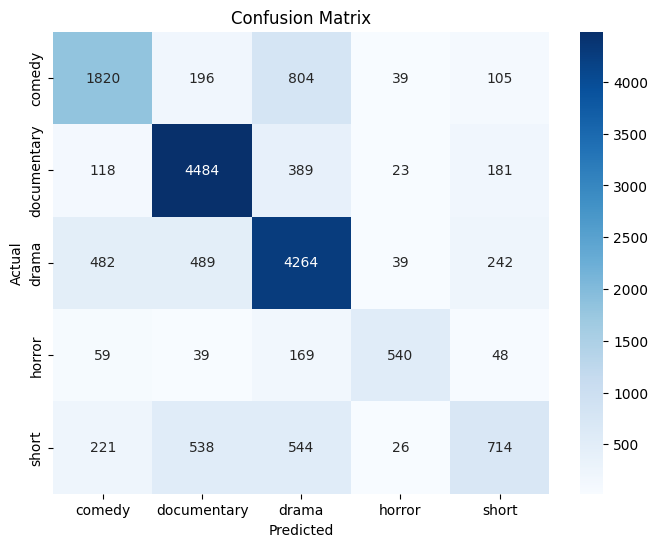

In [138]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [139]:
def predict_genre(text):
    cleaned=clean_text(text)
    vector=tfidf.transform([cleaned])
    prediction=lr.predict(vector)
    return le.inverse_transform(prediction)[0]

In [140]:
predict_genre("An ancient vampire awakens and haunts a group of college students.")

'horror'

In [150]:
samples=[
    # Comedy
    "A group of friends plan a hilarious prank that goes wildly out of control.",

    # Documentary
    "An in-depth look at the life and work of a famous wildlife photographer.",

    # Drama
    "A family struggles to stay together through difficult times and personal loss.",

    # Horror
    "A young woman is haunted by terrifying visions after moving into an old mansion.",

    # Short
    "A brief tale of a boy’s magical encounter with a mysterious stranger in his village."
]

In [151]:
for i, desc in enumerate(samples, 1):
    predicted_genre=predict_genre(desc)
    print(f"Sample {i}:")
    print(f"Description: {desc}")
    print(f"Predicted Genre: {predicted_genre}\n")


Sample 1:
Description: A group of friends plan a hilarious prank that goes wildly out of control.
Predicted Genre: comedy

Sample 2:
Description: An in-depth look at the life and work of a famous wildlife photographer.
Predicted Genre: documentary

Sample 3:
Description: A family struggles to stay together through difficult times and personal loss.
Predicted Genre: drama

Sample 4:
Description: A young woman is haunted by terrifying visions after moving into an old mansion.
Predicted Genre: horror

Sample 5:
Description: A brief tale of a boy’s magical encounter with a mysterious stranger in his village.
Predicted Genre: short

